In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
import cv2

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [2]:
print("insight", insightface.__version__)

insight 0.7.3


In [3]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640,640))


/Users/mac/Desktop/FaceSwap/venv/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mac/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mac/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mac/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mac/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mac/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size

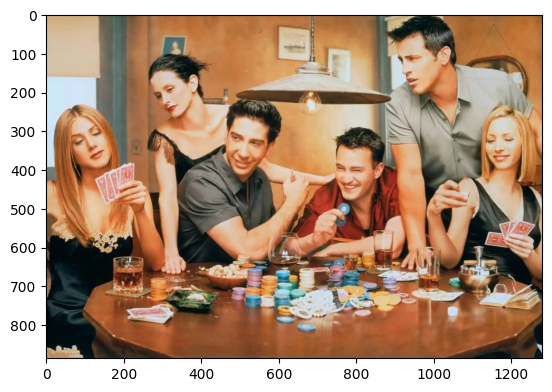

In [4]:
img = ins_get_image("t1")
plt.imshow(img[:,:,::-1])
plt.show()

In [5]:
faces = app.get(img)
faces

[{'bbox': array([466.0821 , 268.6164 , 573.58923, 415.5331 ], dtype=float32),
  'kps': array([[491.85046, 321.8314 ],
         [541.85266, 332.11188],
         [507.67114, 366.41312],
         [485.91962, 369.691  ],
         [533.74945, 378.38107]], dtype=float32),
  'det_score': np.float32(0.9196533),
  'landmark_3d_68': array([[ 4.6944370e+02,  2.9698944e+02,  7.5722794e+01],
         [ 4.6813416e+02,  3.1271912e+02,  7.9219688e+01],
         [ 4.6674796e+02,  3.2896017e+02,  8.1507698e+01],
         [ 4.6605328e+02,  3.4532599e+02,  8.0922783e+01],
         [ 4.6692227e+02,  3.6251474e+02,  7.3334038e+01],
         [ 4.7100317e+02,  3.7718726e+02,  6.5856659e+01],
         [ 4.7596683e+02,  3.9025583e+02,  5.8192699e+01],
         [ 4.8284662e+02,  4.0326260e+02,  4.7107624e+01],
         [ 4.9796429e+02,  4.1465970e+02,  4.2562862e+01],
         [ 5.1666071e+02,  4.1299536e+02,  4.6776672e+01],
         [ 5.3089264e+02,  4.0368939e+02,  5.6901127e+01],
         [ 5.4308667e+02,  3

In [6]:
len(faces)

6

In [7]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

In [8]:
# img = ins_get_image('t1')
# fig, axs = plt.subplots(1, 6, figsize = (12,5))

# for i, faces in enumerate(faces):
#     bbox = faces["bbox"]
#     bbox = [int(b) for b in bbox]
#     axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
#     axs[i].axis('off')


In [9]:
swapper = insightface.model_zoo.get_model('/Users/mac/Desktop/FaceSwap/inswapper_128.onnx', download=False, download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [10]:
faces[0]

{'bbox': array([466.0821 , 268.6164 , 573.58923, 415.5331 ], dtype=float32),
 'kps': array([[491.85046, 321.8314 ],
        [541.85266, 332.11188],
        [507.67114, 366.41312],
        [485.91962, 369.691  ],
        [533.74945, 378.38107]], dtype=float32),
 'det_score': np.float32(0.9196533),
 'landmark_3d_68': array([[ 4.6944370e+02,  2.9698944e+02,  7.5722794e+01],
        [ 4.6813416e+02,  3.1271912e+02,  7.9219688e+01],
        [ 4.6674796e+02,  3.2896017e+02,  8.1507698e+01],
        [ 4.6605328e+02,  3.4532599e+02,  8.0922783e+01],
        [ 4.6692227e+02,  3.6251474e+02,  7.3334038e+01],
        [ 4.7100317e+02,  3.7718726e+02,  6.5856659e+01],
        [ 4.7596683e+02,  3.9025583e+02,  5.8192699e+01],
        [ 4.8284662e+02,  4.0326260e+02,  4.7107624e+01],
        [ 4.9796429e+02,  4.1465970e+02,  4.2562862e+01],
        [ 5.1666071e+02,  4.1299536e+02,  4.6776672e+01],
        [ 5.3089264e+02,  4.0368939e+02,  5.6901127e+01],
        [ 5.4308667e+02,  3.9326663e+02,  6.41

In [11]:
source_face = faces

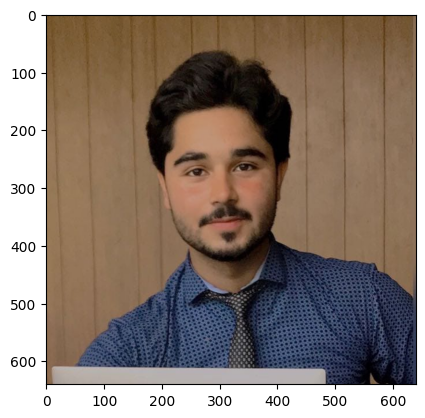

In [12]:
hamza = cv2.imread("/Users/mac/Desktop/FaceSwap/Hamza.jpeg")
plt.imshow(hamza[:,:,::-1])
plt.show()

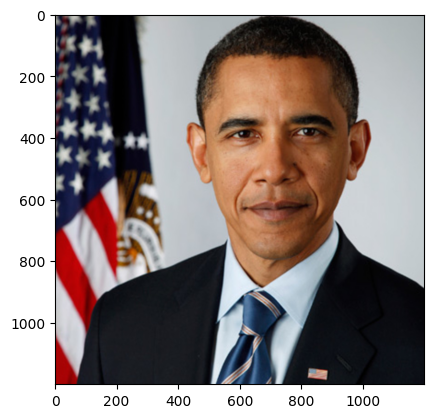

In [13]:
obama= cv2.imread("/Users/mac/Desktop/FaceSwap/Obama.jpg")
plt.imshow(obama[:,:,::-1])
plt.show()

In [14]:
hamza_faces = app.get(hamza)


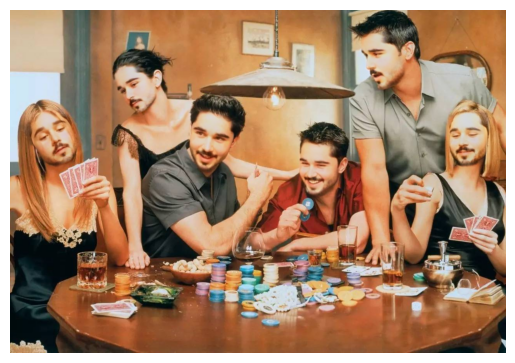

In [16]:
rob_faces = app.get(hamza)
rob_face = rob_faces[0]

res = img.copy()
for face in faces:
    res = swapper.get(res, face, rob_face, paste_back=True)
    
fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

/Users/mac/Desktop/FaceSwap/venv/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CoreMLExecutionProvider, AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mac/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mac/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mac/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mac/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/mac/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size

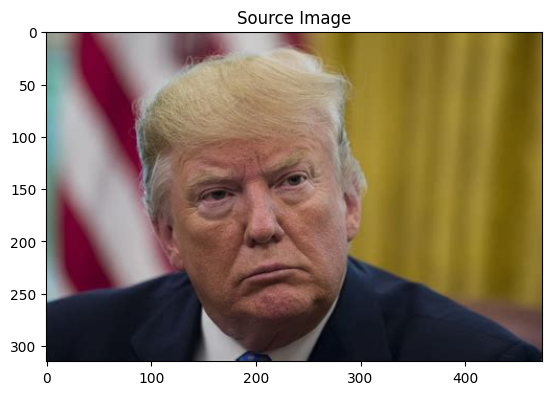

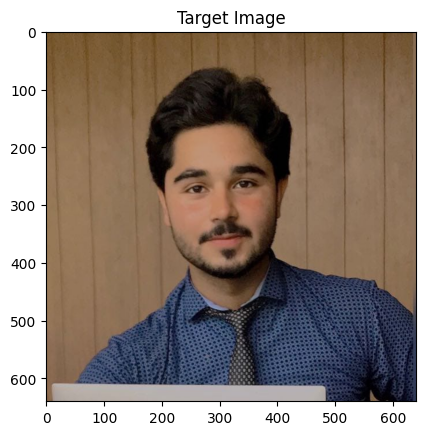

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


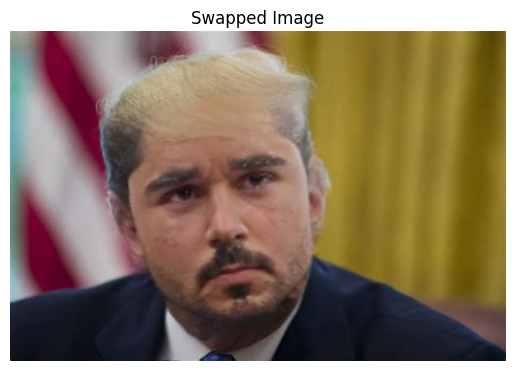

In [19]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis

def swap_faces(source_img_path, target_img_path, swapper_model_path='/Users/mac/Desktop/FaceSwap/inswapper_128.onnx'):
    # Initialize the face analysis model
    app = FaceAnalysis(name='buffalo_l')
    app.prepare(ctx_id=0, det_size=(640, 640))

    # Load source and target images
    source_img = cv2.imread(source_img_path)
    target_img = cv2.imread(target_img_path)

    # Display source and target images (optional)
    plt.imshow(source_img[:, :, ::-1])
    plt.title("Source Image")
    plt.show()
    
    plt.imshow(target_img[:, :, ::-1])
    plt.title("Target Image")
    plt.show()

    # Get faces in source and target images
    source_faces = app.get(source_img)
    target_faces = app.get(target_img)
    
    if len(target_faces) == 0 or len(source_faces) == 0:
        raise ValueError("No faces detected in source or target image.")
    
    # Take the first face in the target image (for simplicity)
    target_face = target_faces[0]

    # Load the swapper model
    swapper = insightface.model_zoo.get_model(swapper_model_path, download=False, download_zip=False)

    # Perform face swapping
    swapped_img = source_img.copy()
    for face in source_faces:
        swapped_img = swapper.get(swapped_img, face, target_face, paste_back=True)

    # Display the result
    plt.imshow(swapped_img[:, :, ::-1])
    plt.title("Swapped Image")
    plt.axis('off')
    plt.show()

    return swapped_img

# Example usage
swapped_image = swap_faces("/Users/mac/Desktop/FaceSwap/Trump.jpeg", "/Users/mac/Desktop/FaceSwap/Hamza.jpeg")
